In [63]:
import pandas as pd
df = pd.read_csv('D:\Data Sets\Employers_data.csv')

In [64]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Employee_ID            Name  Age  Gender   Department  Job_Title  \
0            1    Merle Ingram   24  Female  Engineering   Engineer   
1            2      John Mayes   56    Male        Sales  Executive   
2            3    Carlos Wille   21    Male  Engineering     Intern   
3            4  Michael Bryant   30    Male      Finance    Analyst   
4            5   Paula Douglas   25  Female           HR    Analyst   

   Experience_Years Education_Level  Location  Salary  
0                 1          Master    Austin   90000  
1                33          Master   Seattle  195000  
2                 1        Bachelor  New York   35000  
3                 9        Bachelor  New York   75000  
4                 2          Master   Seattle   70000  


In [65]:
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None


In [66]:
print("\n Dataset Shape:")
print(df.shape)


 Dataset Shape:
(10000, 10)


In [67]:
print("\n Dataset Columns:")
print(df.columns.tolist())


 Dataset Columns:
['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title', 'Experience_Years', 'Education_Level', 'Location', 'Salary']


In [68]:
print("\n----- Problem Statement -----")
print("The goal of this project is to analyze employer-related data and predict employee salary "
      "based on various factors such as experience, job title, and education level. "
      "This helps HR departments make data-driven salary decisions and understand workforce trends.")



----- Problem Statement -----
The goal of this project is to analyze employer-related data and predict employee salary based on various factors such as experience, job title, and education level. This helps HR departments make data-driven salary decisions and understand workforce trends.


In [69]:
print("\n----- Task Type -----")
print("\nTask Type: Regression (Predicting continuous numerical values).")


----- Task Type -----

Task Type: Regression (Predicting continuous numerical values).


In [70]:
print("\n----- Variables -----")
input_features = df.columns.tolist()[0:9]
output_variable = df.columns.tolist()[9]
print("Input Variables (Features):", input_features)
print("Output Variable (Target):", output_variable)


----- Variables -----
Input Variables (Features): ['Employee_ID', 'Name', 'Age', 'Gender', 'Department', 'Job_Title', 'Experience_Years', 'Education_Level', 'Location']
Output Variable (Target): Salary


In [71]:
print("\n Missing Values:")
print(df[input_features + [output_variable]].isnull().sum())
print("\n Duplicate Rows Before Cleaning:")
print(df[input_features + [output_variable]].duplicated().sum())
print(df[input_features + [output_variable]].dropna().sum())


 Missing Values:
Employee_ID         0
Name                0
Age                 0
Gender              0
Department          0
Job_Title           0
Experience_Years    0
Education_Level     0
Location            0
Salary              0
dtype: int64

 Duplicate Rows Before Cleaning:
0
Employee_ID                                                  50005000
Name                Merle IngramJohn MayesCarlos WilleMichael Brya...
Age                                                            354559
Gender              FemaleMaleMaleMaleFemaleMaleFemaleFemaleMaleFe...
Department          EngineeringSalesEngineeringFinanceHRFinanceMar...
Job_Title           EngineerExecutiveInternAnalystAnalystManagerAn...
Experience_Years                                               123709
Education_Level     MasterMasterBachelorBachelorMasterPhDBachelorM...
Location            AustinSeattleNew YorkNew YorkSeattleNew YorkSa...
Salary                                                     1153815000
dtype: object

In [72]:
print("\nAfter Cleaning:")
print("Missing Values:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())


After Cleaning:
Missing Values: 0
Duplicates: 0


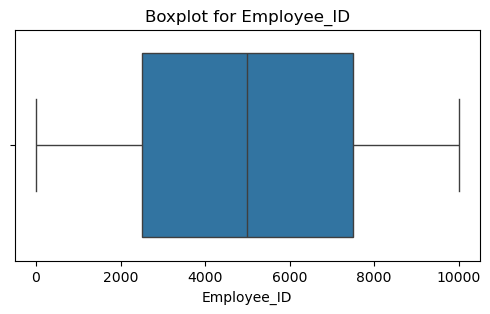

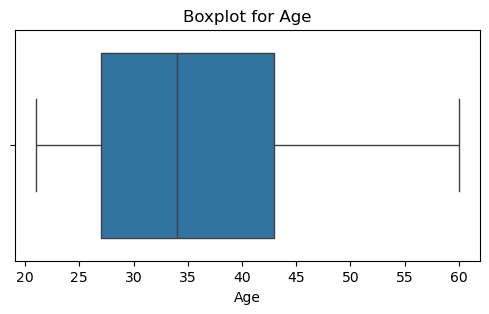

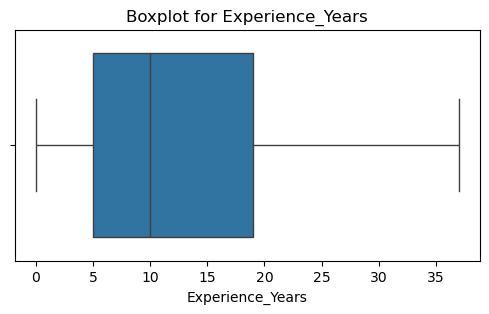

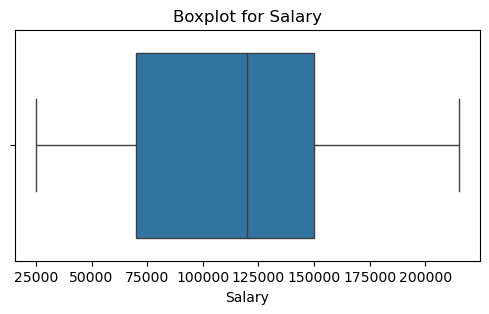

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [74]:
print("\nFinal Cleaned Dataset Shape:", df.shape)


Final Cleaned Dataset Shape: (10000, 10)


In [75]:
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("\nEncoded Data Shape:", df_encoded.shape)


Encoded Data Shape: (10000, 9887)


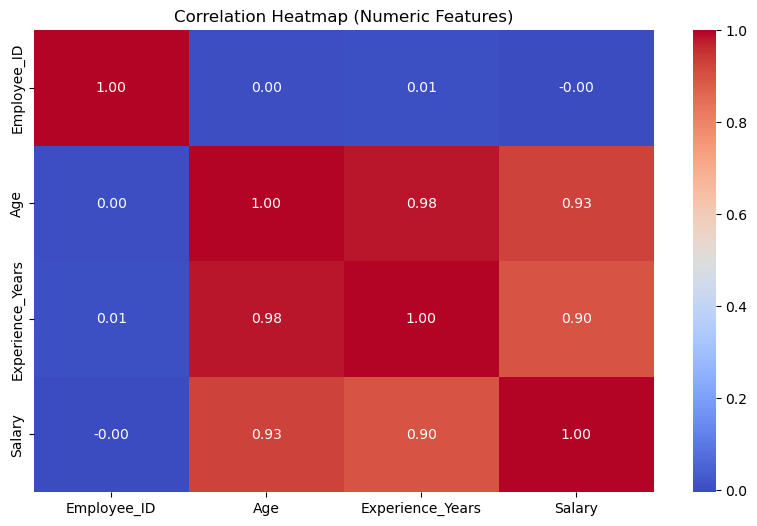

In [76]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

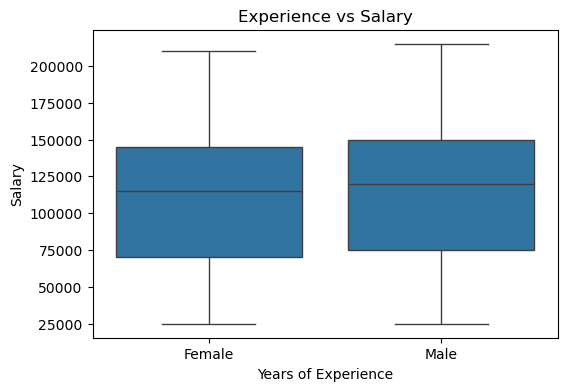

In [77]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

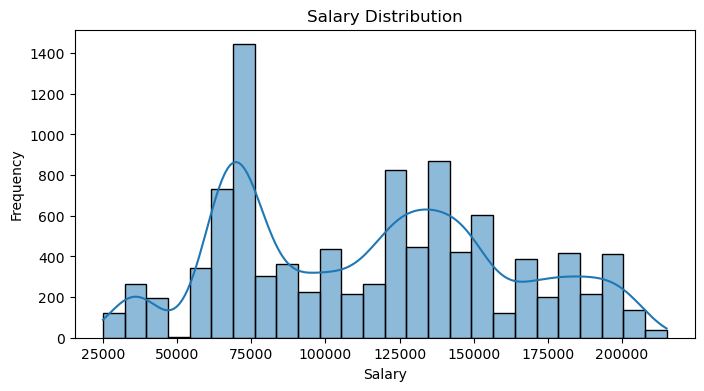

In [78]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

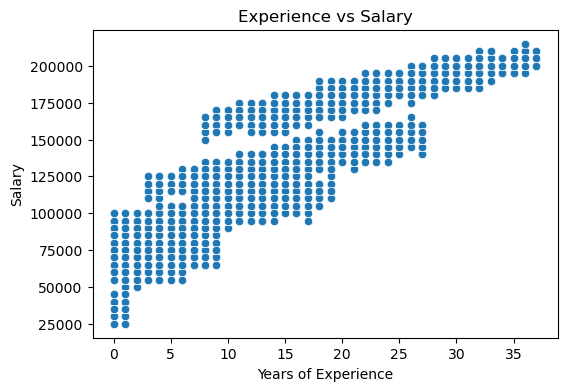

In [79]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Experience_Years', y='Salary', data=df)
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

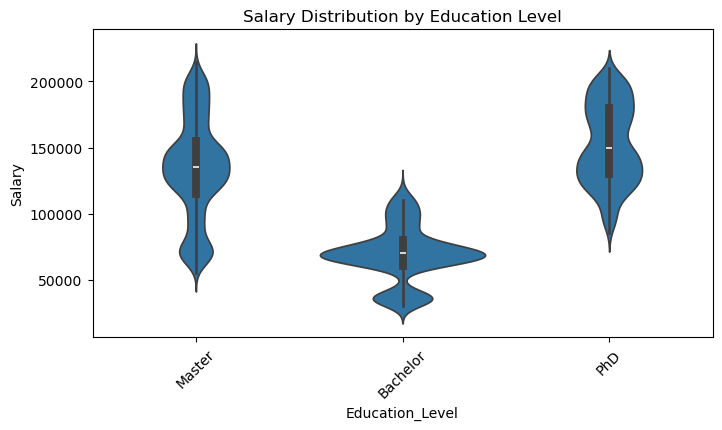

In [80]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='Education_Level', y='Salary', data=df)
plt.title("Salary Distribution by Education Level")
plt.xticks(rotation=45)
plt.show()

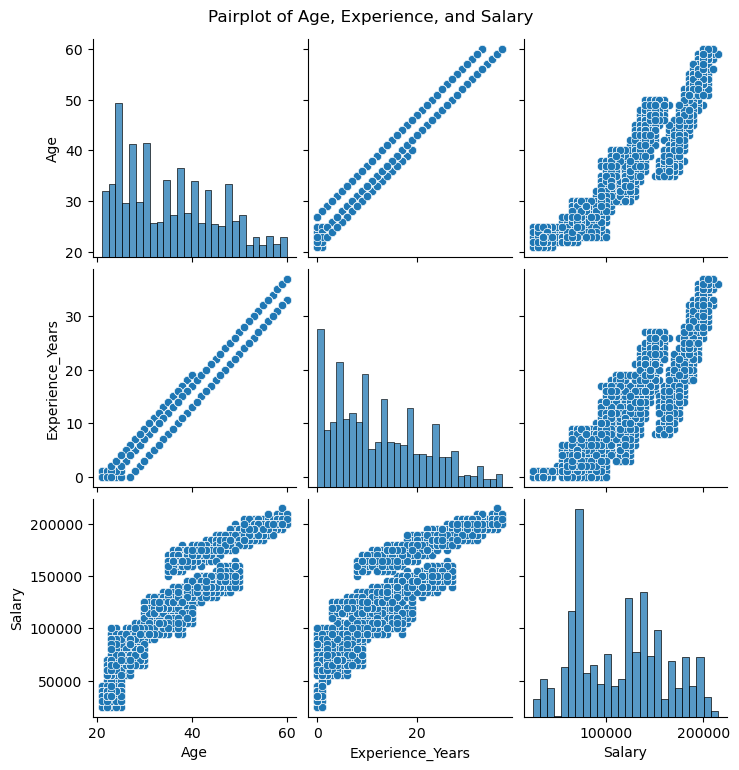

In [81]:
sns.pairplot(df[['Age', 'Experience_Years', 'Salary']])
plt.suptitle("Pairplot of Age, Experience, and Salary", y=1.02)
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [98]:
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

In [101]:
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [102]:
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, lr_preds)
# Step 6: Define evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} Evaluation ---")
    print("R2 Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

# Step 7: Evaluate both models
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)




--- Linear Regression Evaluation ---
R2 Score: 0.9861422797046291
MAE: 4294.913900389358
MSE: 29207390.38657118
RMSE: 5404.386217376695

--- Random Forest Evaluation ---
R2 Score: 0.9907340265858984
MAE: 3519.85
MSE: 19529540.0
RMSE: 4419.223913765855


In [107]:
print("y_test sample:", y_test[:5])
print("lr_preds sample:", lr_preds[:5])
print("rf_preds sample:", rf_preds[:5])


y_test sample: 6252    135000
4684     70000
1731     65000
4742    125000
4521    140000
Name: Salary, dtype: int64
lr_preds sample: [137551.65642559  74510.37342174  63590.92248182 125828.55979953
 143346.70779961]
rf_preds sample: [136600.  76200.  67550. 126450. 143100.]


In [108]:
print("y_test type:", type(y_test), "Shape:", y_test.shape)
print("lr_preds type:", type(lr_preds), "Shape:", lr_preds.shape)
print("rf_preds type:", type(rf_preds), "Shape:", rf_preds.shape)


y_test type: <class 'pandas.core.series.Series'> Shape: (2000,)
lr_preds type: <class 'numpy.ndarray'> Shape: (2000,)
rf_preds type: <class 'numpy.ndarray'> Shape: (2000,)


In [110]:
lr_preds = lr_preds.ravel()
rf_preds = rf_preds.ravel()
print(lr_preds)
print(rf_preds)

[137551.65642559  74510.37342174  63590.92248182 ...  91027.85644631
 193707.20249287  58275.46605515]
[136600.  76200.  67550. ...  96150. 189050.  64550.]


In [114]:
import joblib
best_model = rf_model if r2_score(y_test, rf_preds) > r2_score(y_test, lr_preds) else lr_model
joblib.dump(best_model, 'best_salary_model.pkl')
print("\n Best model saved as 'best_salary_model.pkl'")



 Best model saved as 'best_salary_model.pkl'
